In [125]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import hvplot.pandas
from pathlib import Path
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [126]:
# Read salary data
df = pd.read_csv('Resources/user_behavior_dataset.csv')

# Display sample data
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [127]:
# Display columns of Dataframe
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [128]:
# Display information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [129]:
# Reformat data of the independent variable X as a single-column array
X = df['User Behavior Class'].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[4],
       [3],
       [2],
       [3],
       [3]], dtype=int64)

In [130]:
# The shape of X is 700 samples, with a single feature (column)
X.shape

(700, 1)

In [131]:
# Create an array for the dependent variable y
y = df["Age"]

In [132]:
# Create a model with scikit-learn
model = LinearRegression()

In [133]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [134]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [135]:
# Create a copy of the original data
df_predicted = df.copy()

# Add a column with the predicted salary values
df_predicted["Predictions"] = predicted_y_values

# Display sample data
df_predicted.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Predictions
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,38.477987
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,38.482809
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,38.487631
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,38.482809
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,38.482809


In [136]:
# Plot data
fig1 = df_predicted.hvplot.line(
    x = "Predictions",
    y = "User Behavior Class",
    title = "Predictions"
)
fig1

:Curve   [Predictions]   (User Behavior Class)

__________

# Model Training

In [137]:
# Drop User ID and User Behavior for X and make target column 'User Behavior Class' y
X = df.drop(['User ID', 'User Behavior Class'], axis=1)
y = df['User Behavior Class']

In [138]:
# Create variables for categorical columns and also numerical columns
categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

In [139]:
# Create variables for the pipeline model and the preprocess model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [140]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [141]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Data Usage (MB/day)',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [142]:
# Predict variable on test data
y_pred = model.predict(X_test)

In [143]:
# Print Classification Report and Confusing Matrix with set predictions
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



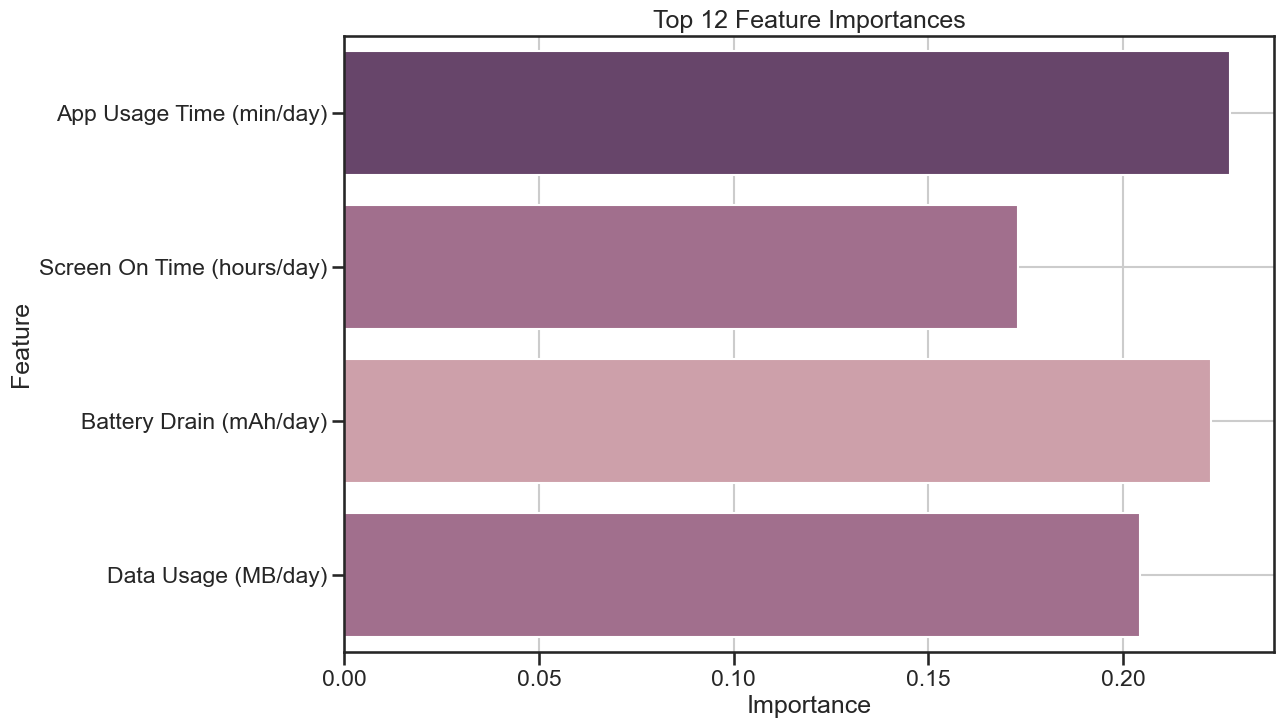

In [144]:
# Create if statement for data for if they have attribute to measure/predict importance of the features in the data
if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    
    # Create OneHotEncoder variable with transformed columns
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']

    # Create feature variable for numerical columns with list of items within the categorical columns
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
    
    # Create variable to show importance values per feature
    importances = model.named_steps['classifier'].feature_importances_

    # Create dataframe of the importances using 'Feature' and 'Importance' as columns for feature_names and importances values
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the dataframe in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Drop the devices listed in dataframe
    # feature_importance_df = feature_importance_df.drop(labels=['Age', 'Device Model_Samsung Galaxy S21', 'Gender_Male', 'Device Model_Xiaomi Mi 11', 'Operating System_iOS', 'Device Model_OnePlus 9', 'Device Model_iPhone 12'], axis=0, inplace=True)

    # Display Dataframe for exact values
    feature_importance_df.head(4)

    # Plot classification model
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(4), hue=y, legend=False)
    plt.title('Top 4 Feature Importances')
    plt.grid()
    plt.show()

### Prediction of Battery Drain Features

In [145]:
# Create variable of Features and Target
X = df.drop(['User ID', 'Battery Drain (mAh/day)'], axis=1)   
y = df['Battery Drain (mAh/day)']

In [146]:
# Create variables of Categorical Columns and Numerical Columns
categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

In [147]:
# Variable for pipeline and processor model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [148]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Number of Apps Installed',
                                                   'Data Usage (MB/day)',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [149]:
# Create prediction variable
y_pred = model.predict(X_test)

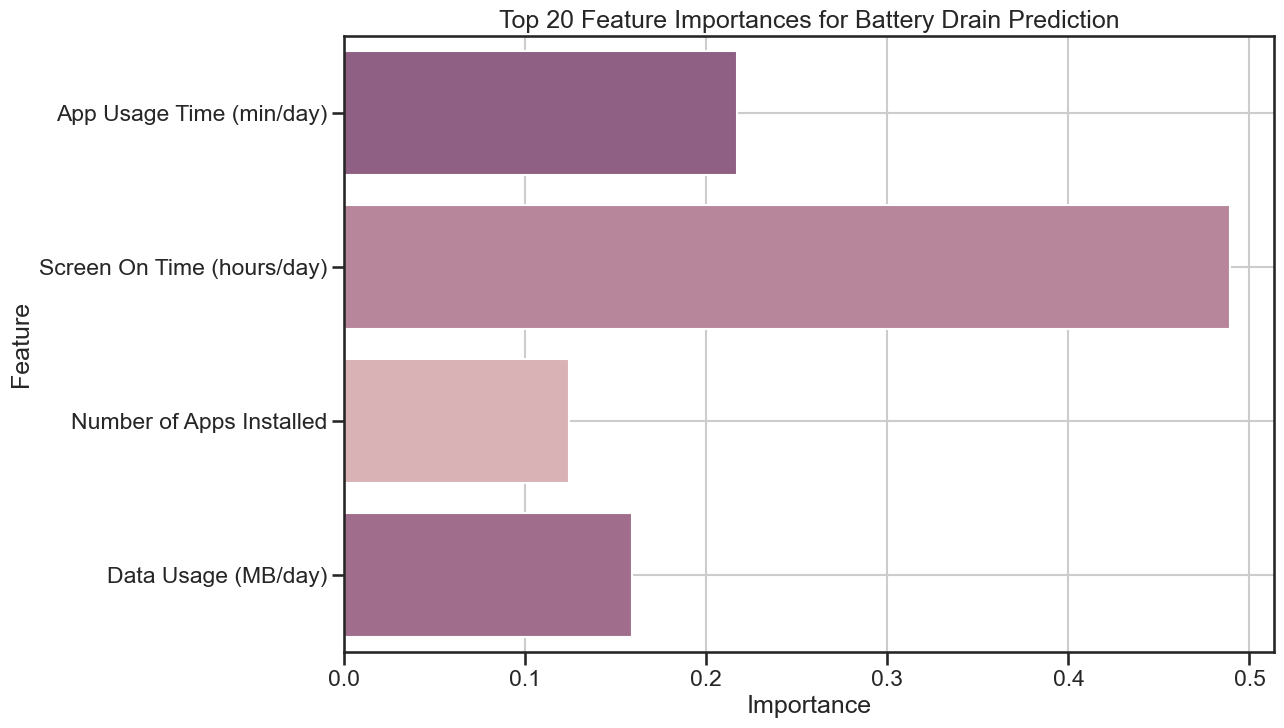

In [150]:
# Create if statement for data for if they have attribute to measure/predict importance of the features in the data
if hasattr(model.named_steps['regressor'], 'feature_importances_'):
   
    # Create OneHotEncoder varible for processing
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']

    # Create feature name varible to use to create a dataframe
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
    
    # Create variable to show importance values per feature regarding the target
    importances = model.named_steps['regressor'].feature_importances_

    # Create the dataframe of the Features and their Importance values
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the data within the Dataframe to Decsending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Drop the devices listed in dataframe
    # feature_importance_df = feature_importance_df.drop(labels=['Age', 'Device Model_Samsung Galaxy S21', 'Gender_Male', 'Device Model_Xiaomi Mi 11', 'Operating System_iOS', 'Device Model_OnePlus 9', 'Device Model_iPhone 12'], axis=0, inplace=True)

    # Display the new dataframe
    feature_importance_df.head(4)
    
    # Plot dataframe
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(4), hue=y, legend=False)
    plt.title('Top Feature Importances for Battery Drain Prediction')
    plt.grid()
    plt.show()

_________

### Plotting the Data

In [151]:
# Setting up theme for Seaborn
sns.set_theme('notebook')
sns.set_style("ticks")
sns.set_context("talk")

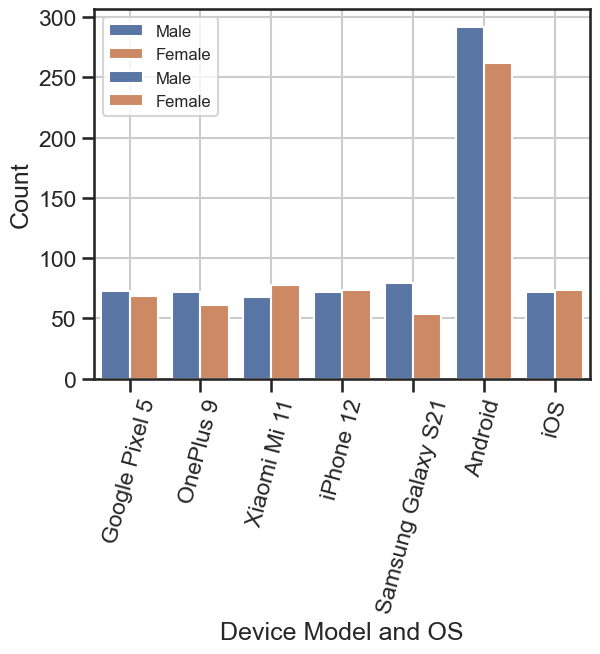

In [152]:
sns.countplot(data = df, x = df['Device Model'], hue = df['Gender'])
sns.countplot(data = df, x = df['Operating System'], hue = df['Gender'])

plt.legend(loc = 'upper left', fontsize = 12)
plt.ylabel('Count')
plt.xlabel('Device Model and OS')
plt.xticks(rotation = 75)
plt.grid()

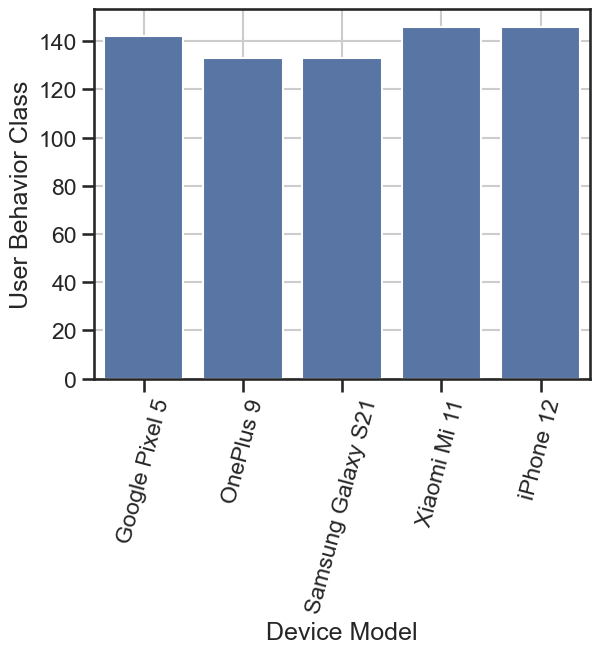

In [153]:
# Plotting Device/Model distribution amount
sns.barplot(x = "Device Model", y = "User Behavior Class", data = df.groupby("Device Model").agg({"User Behavior Class":"count"}))
plt.xticks(rotation = 75)
plt.grid()

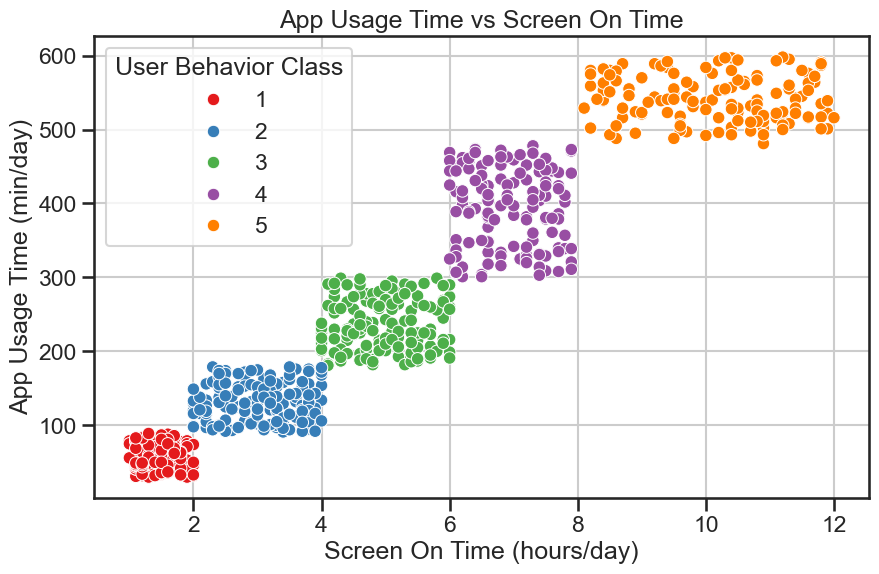

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Screen On Time (hours/day)', y='App Usage Time (min/day)', hue='User Behavior Class', palette='Set1')
plt.title('App Usage Time vs Screen On Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('App Usage Time (min/day)')
plt.legend(title='User Behavior Class')
plt.grid()
plt.show()